## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import requests

In [3]:
import datetime
from datetime import datetime, timedelta

In [4]:
import pandas_datareader as pdr

In [5]:
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError

## Datos

In [6]:
start_date = '2018-01-01'
end_date = '2021-07-16'

In [7]:
stock = 'AMZN'

In [8]:
def get_data(ticker):    
    try:
        stock_data = data.DataReader(ticker, 'yahoo', start_date, end_date)
        return stock_data
    except:
        print(f'No se encontraron datos para: {ticker}')


In [9]:
df = get_data(stock)

In [10]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-12,3757.290039,3696.790039,3744.000000,3718.550049,2571600,3718.550049
2021-07-13,3773.080078,3671.320068,3702.100098,3677.360107,3845900,3677.360107
2021-07-14,3717.659912,3660.830078,3708.850098,3681.679932,3296600,3681.679932
2021-07-15,3695.399902,3620.919922,3694.199951,3631.199951,3185300,3631.199951
2021-07-16,3646.060059,3570.459961,3633.310059,3573.629883,4038400,3573.629883


**Estadisticas descriptivas**

In [11]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000
mean,2252.085070,2200.303479,2227.695400,2226.767943,4.628608e+06,2226.767943
std,702.190111,685.312139,694.359846,692.864008,2.124984e+06,692.864008
min,1190.000000,1170.510010,1172.000000,1189.010010,8.813000e+05,1189.010010
25%,1738.925049,1694.659973,1720.794983,1719.809998,3.118200e+06,1719.809998
50%,1903.790039,1867.329956,1888.510010,1886.520020,4.121900e+06,1886.520020
75%,3125.790039,3036.919922,3091.099976,3085.535034,5.618900e+06,3085.535034
max,3773.080078,3696.790039,3744.000000,3731.409912,1.556730e+07,3731.409912


**Calculamos la media movil para el precio de cierre**

In [31]:
df['Close_MM'] = df['Close'].rolling(window=10).mean()

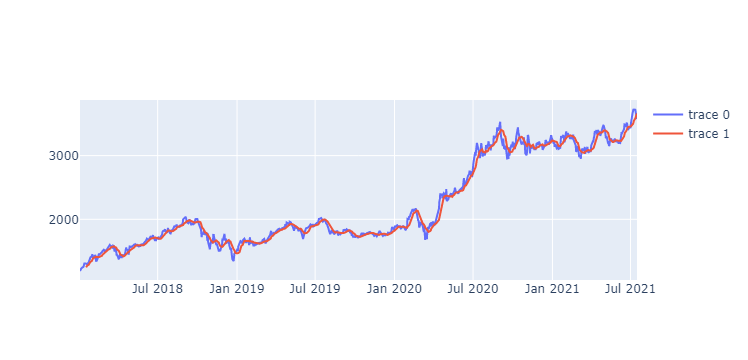

In [37]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x = df.index,
    y = df['Close']
))


fig.add_trace(go.Scatter(
    x = df.index,
    y = df['Close_MM']
))

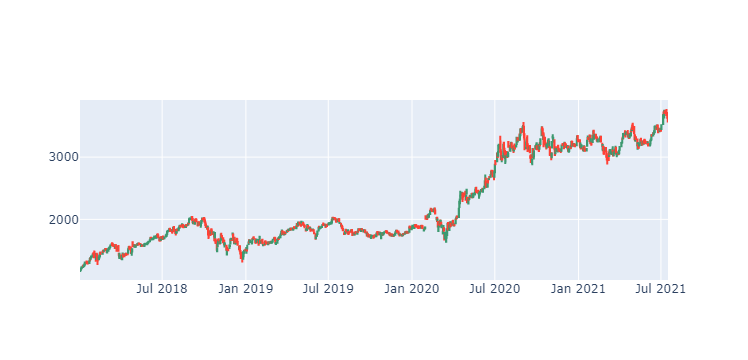

In [42]:
fig = go.Figure(
    data = [
        go.Candlestick(
            x = df.index,
            open=df['Open'],
            close=df['Close'],
            high=df['High'],
            low=df['Low']
        )
    ]
)

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

In [39]:
list(df)

['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Close_MM']